In [56]:
!pip install yfinance

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
#from pandas_datareader import data as wb
import yfinance as yf
%matplotlib inline

In [58]:
ticker = 'TSLA'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start = '2010-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [59]:
log_returns = np.log(1 + data.pct_change())

In [60]:
log_returns.tail()

,TSLA
Date,
2023-03-21,0.075292
2023-03-22,-0.033085
2023-03-23,0.005582
2023-03-24,-0.009461
2023-03-27,0.007326


<AxesSubplot: xlabel='Date'>

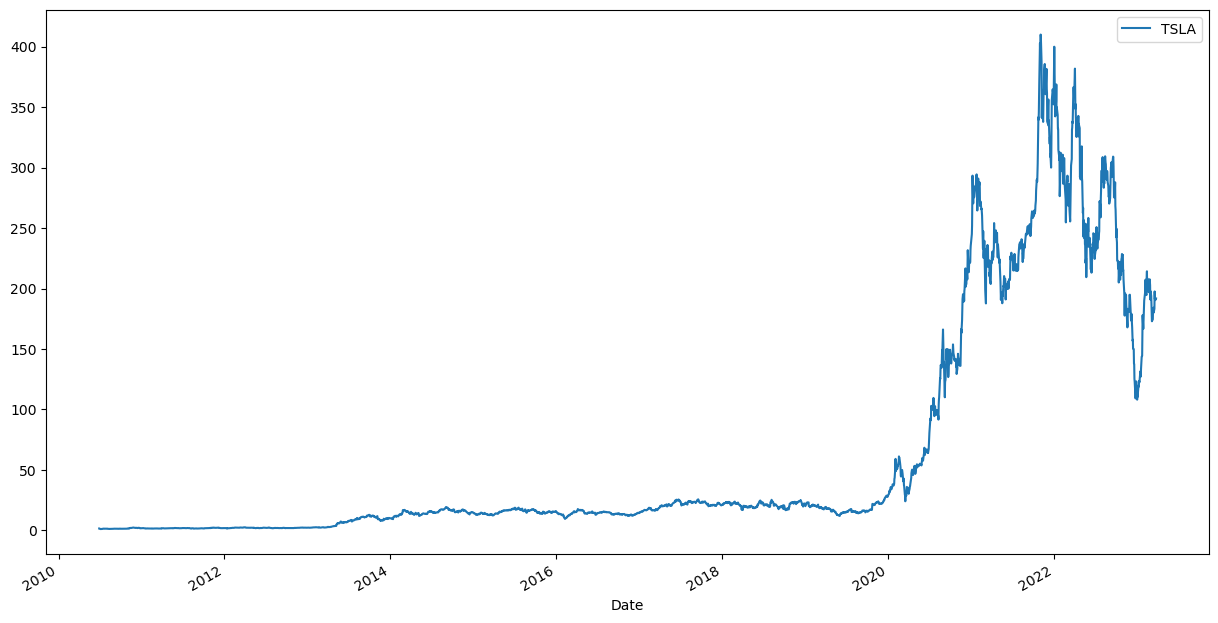

In [61]:
data.plot(figsize = (15,8))

<AxesSubplot: xlabel='Date'>

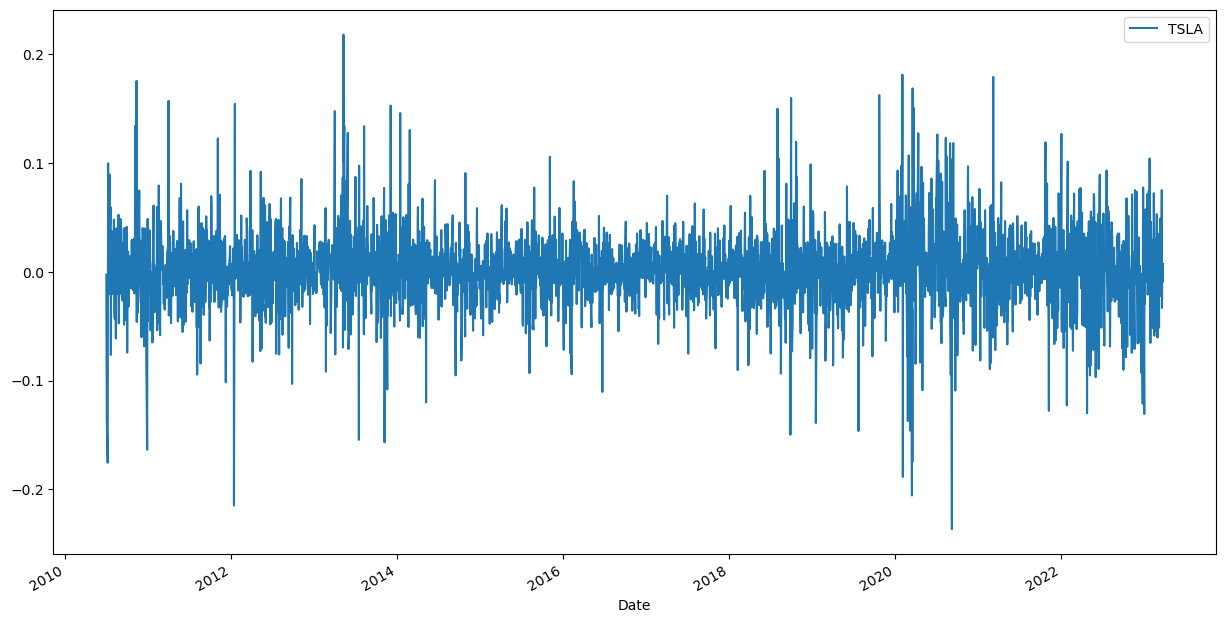

In [62]:
log_returns.plot(figsize = (15,8))

In [63]:
u = log_returns.mean()
u

TSLA    0.001494
dtype: float64

In [64]:
var = log_returns.var()
var

TSLA    0.001298
dtype: float64

In [65]:
drift = u - (0.5*var)
drift

TSLA    0.000845
dtype: float64

In [66]:
stdev = log_returns.std()
stdev

TSLA    0.036027
dtype: float64

In [67]:
np.array(drift)

array([0.00084497])

In [68]:
stdev.values

array([0.03602708])

In [69]:
norm.ppf(0.95)

1.6448536269514722

In [70]:
x = np.random.rand(10,2)
x

array([[0.32918273, 0.37501321],
       [0.17572917, 0.94743561],
       [0.27995664, 0.0612382 ],
       [0.78304896, 0.65707743],
       [0.04279419, 0.41192617],
       [0.7751255 , 0.22194895],
       [0.80850224, 0.33945756],
       [0.54386069, 0.66930862],
       [0.48400793, 0.35578894],
       [0.42090014, 0.78089656]])

In [71]:
norm.ppf(x)

array([[-0.44217101, -0.31860452],
       [-0.9317643 ,  1.62048203],
       [-0.58297033, -1.54446221],
       [ 0.78253185,  0.40449992],
       [-1.71914272, -0.22259292],
       [ 0.75583354, -0.76562763],
       [ 0.87239026, -0.41394401],
       [ 0.11016487,  0.43800487],
       [-0.04009693, -0.36973779],
       [-0.19959125,  0.77522473]])

In [72]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.04443126, -0.44148544],
       [-0.10536817,  0.6402816 ],
       [-0.65837361,  0.01033635],
       [ 0.08546044,  1.03209236],
       [ 0.56087373,  1.77755924],
       [ 1.53229733, -0.30330504],
       [ 0.87872861, -0.3685704 ],
       [-0.36413602, -0.11403596],
       [ 0.07608499, -0.70949781],
       [ 2.15603417,  1.19133459]])

In [73]:
time_intervals = 1000
iterations = 10

In [74]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(time_intervals, iterations)))
daily_returns

array([[0.93731607, 0.95258002, 0.94998799, ..., 0.97902405, 0.97927829,
        1.05504146],
       [0.99881182, 0.98658245, 1.00609955, ..., 0.97977822, 1.0074728 ,
        1.04557485],
       [1.01906664, 1.00955259, 1.07234031, ..., 1.00119944, 0.9911764 ,
        0.96040878],
       ...,
       [1.02024585, 1.01074687, 1.01155634, ..., 0.98863029, 0.93222269,
        0.99469215],
       [1.02647726, 1.00320518, 0.97257474, ..., 0.99576627, 1.0193082 ,
        0.97534197],
       [0.97852851, 1.00968621, 1.01063711, ..., 1.05852723, 0.97609565,
        1.01408621]])

In [75]:
s0 = data.iloc[-1]
s0

TSLA    191.809998
Name: 2023-03-27 00:00:00, dtype: float64

In [76]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
price_list[0] = s0
price_list

array([[191.80999756, 191.80999756, 191.80999756, ..., 191.80999756,
        191.80999756, 191.80999756],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [78]:
for t in range(1, time_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [79]:
price_list

array([[ 191.80999756,  191.80999756,  191.80999756, ...,  191.80999756,
         191.80999756,  191.80999756],
       [ 191.58209244,  189.23637695,  192.97995315, ...,  187.93125843,
         193.24335468,  200.55171025],
       [ 195.23491893,  191.04407522,  206.94018187, ...,  188.15667048,
         191.53825248,  192.6116228 ],
       ...,
       [ 457.22753985, 2135.93456687,  492.26953171, ...,  111.97951064,
         594.76703725,  412.05606126],
       [ 469.33367081, 2142.78061913,  478.76891251, ...,  111.50542016,
         606.25091943,  401.89557093],
       [ 459.25637525, 2163.5360336 ,  483.86162889, ...,  118.031524  ,
         591.75888448,  407.5567575 ]])

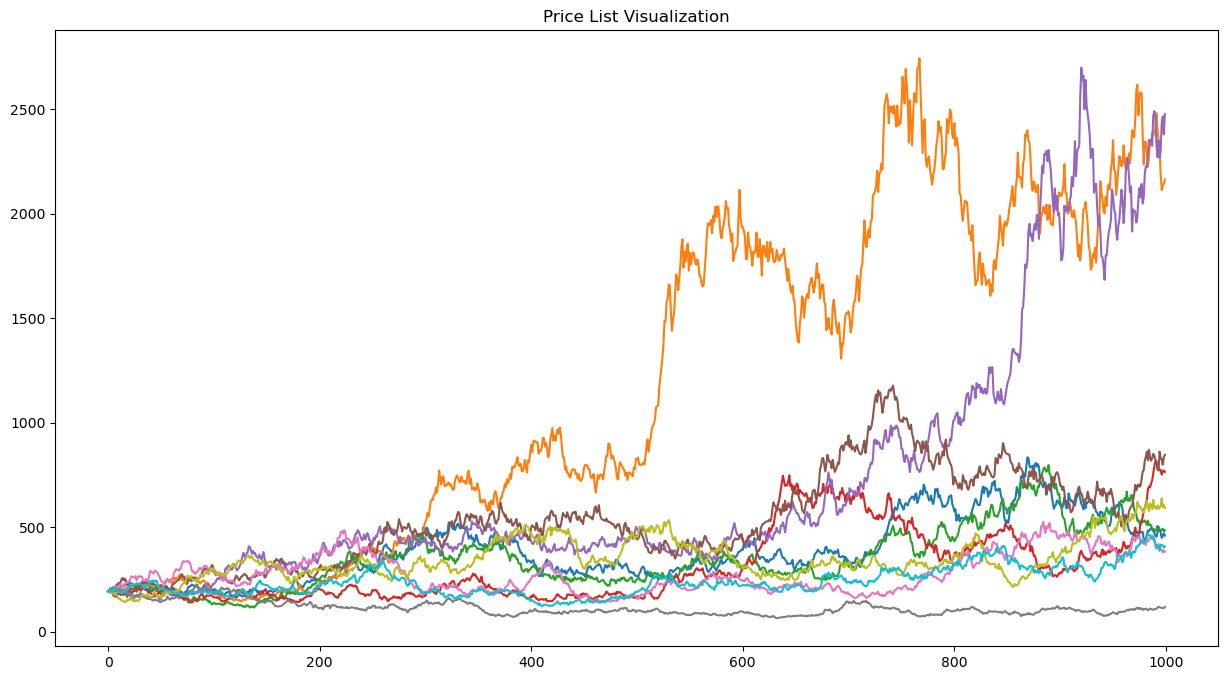

In [80]:
plt.figure(figsize = (15,8))
plt.title('Price List Visualization')
plt.plot(price_list);